<a href="https://colab.research.google.com/github/rcolo88/Machine-Learning-1-Final/blob/main/Final_RobertCologero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final


In [1]:
%pylab inline 
import numpy.linalg as LA

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Fill in your name in the cell below:

In [2]:
# Replace your own name
NAME = 'Robert Cologero'
print('My name is ' + NAME )

My name is Robert Cologero


## Final Guideline
- The deadline is **Dec 8th 10:30am**. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _FINAL_YOURNAME.ipynb_ (for example, _Final_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. If you would like to implement certain algorithms, you have to implement them from scratch. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!



### Additional Guideline

- Your job in the final is to perform an analysis of these face image data sets. Your work will be assessed in two parts: **your algorithm performance (70pt)** and **your reasoning (30pt)**. 

- You can use any (and hopefully all) of the different **clustering** and **classification** methods discussed. Be sure to compare them against each other in these tasks.

- Your code should be efficient and finish all these tasks in reasonable running time. So you don't need to show me how you tune these hyper-parameters in your code. But you should mention your tuning process and results in your reasoning. 
If your code requires excessive time running, your score might be deducted up to 20%. 

- To give a bit more motivation, I will award bonus points to the top three final work. The winner receives 15pt, the runner up receives 10pt and the third place receives 5pt. I may also award special points for solutions of outstanding elegance.   

- (Optional, but strongly recommmended) I suggest you create a github account and upload your final work to a repository. When you submit your final to blackboard, please also include your  link to your github repository.  

In [3]:

# Load the faces datasets
lfw_people = fetch_lfw_people(min_faces_per_person=120, resize=0.4)

In [4]:
X = lfw_people.images

# the label to predict is the id of the person
y = lfw_people.target
# y values are 0, 1, 2, 3. Each corresponds to the following target names. 

target_names = lfw_people.target_names
print(target_names)
print(unique(y))

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Tony Blair']
[0 1 2 3]


In [5]:
# Split in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)


(773, 50, 37)
(258, 50, 37)


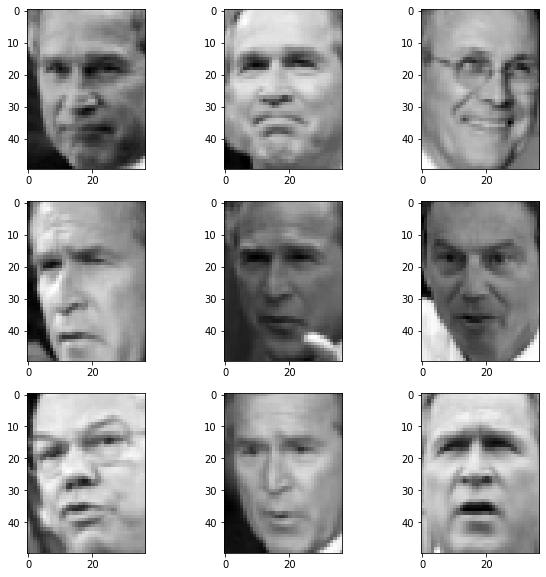

In [6]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(X_train[i], cmap='gray')



---


# Task 1: Face Classification
Consider the various faces in the **training set** `(X_train, y_train)` and see if you can build a classifier that can reasonably identify an individual face in the **testing set** `(X_test, y_test)`. 

In [7]:
# your code for task 1 starts here

In [8]:
# PCA with SVD method
X_train=np.reshape(X_train,(773,1850))  # we must first reshape the original training set so each row is an image
xt = np.reshape(X_test,(258,1850))
u, s, vh =svd(X_train) 

#out=vh.T
Xtr =X_train. dot(vh[:,:100])


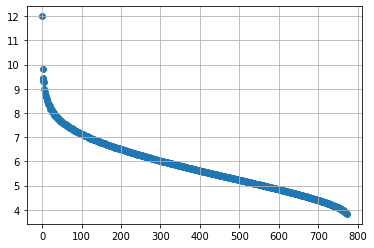

In [9]:
scatter(arange(773), log(s));
grid('on')

In [10]:
xt = np.reshape(X_test,(258,1850))
XT = xt.dot(vh[:,:100])


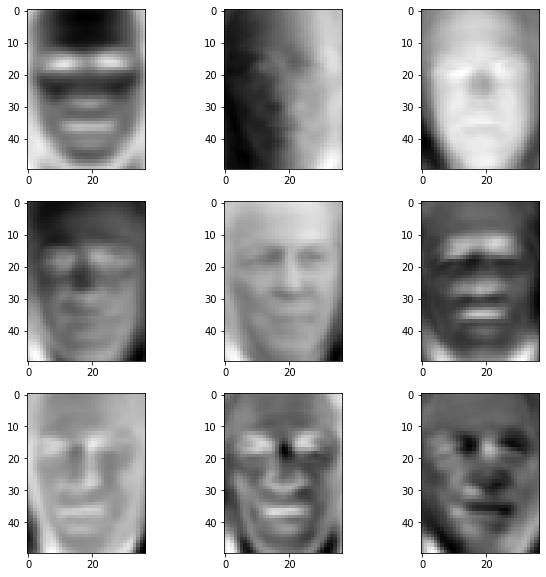

In [11]:
PC = vh[:9,:] # top 9 PCs
PC_image = reshape(PC, [9, 50,37])
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(PC_image[i], cmap='gray');


In [12]:
y=np.copy(y_train)

y1=np.copy(y)
y1[y==1]=0
y1[y==2]=0
y1[y==3]=0
y1[y==0]=1
y2=np.copy(y)
y2[y==1]=1
y2[y==2]=0
y2[y==3]=0
y2[y==0]=0
y3=np.copy(y)
y3[y==1]=0
y3[y==2]=1
y3[y==3]=0
y3[y==0]=0
y4=np.copy(y)
y4[y==1]=0
y4[y==2]=0
y4[y==3]=1
y4[y==0]=0

In [13]:
Xtrp = hstack([ones([773,1]),np.copy(Xtr)])
xtp = hstack([ones([258,1]),np.copy(XT)])

In [14]:
# Logistic Regression with mini batch 



def predict(X, w):
	z = X.dot(w)
	return 1.0 / (1.0 + exp(-z))
 


def train_weights(X, y, l_rate_span, n_iter, weights, batch_size, threshold=0.002):

  n,m = X.shape

  for iter in range(n_iter):
    l_rate   = l_rate_span[iter]
    sum_error = 0
    arr=arange(n)
    np.random.shuffle(arr)

    for i in range(int(n/batch_size)):
      batch_sum = 0
      batch=arr[i*batch_size:(i+1)*batch_size]

      for j in batch:
        pred = predict(X[j,:], weights)
        error = pred - y[j]
        sum_error = sum_error + error**2
        batch_sum = batch_sum + error*X[j,:]
      weights = weights - (l_rate/batch_size) * batch_sum
     
    #print('sum_error at ',iter+1, 'iteration is ', sum_error)

  return weights


weight_IC = ones((101))
n_iter = 300
n_span = arange(n_iter)
l_rate_span = 1/((1+2 * n_span)**.2)
weights1 =train_weights(Xtrp, y1, l_rate_span, n_iter, weight_IC, 25)
weights2 =train_weights(Xtrp, y2, l_rate_span, n_iter, weight_IC, 25)
weights3 =train_weights(Xtrp, y3, l_rate_span, n_iter, weight_IC, 25)
weights4 =train_weights(Xtrp, y4, l_rate_span, n_iter, weight_IC, 25)
weights_final=column_stack((weights1,weights2,weights3,weights4)) # creeate a weight matrix 
weights_final.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


(101, 4)

In [15]:
def predict1(x,w):
  a = x.dot(w[:,0])
  b = x.dot(w[:,1])
  c = x.dot(w[:,2])
  d = x.dot(w[:,3])
  z = [a,b,c,d]
  return argmax(z)

In [16]:
pred=[]
for i in xtp:
  pred.append(predict1(i,weights_final))

print('Test Error for Logistic Regression is',norm(pred-y_test,0)/258)
print(bincount(pred))
print(bincount(y_test))


Test Error for Logistic Regression is 0.24031007751937986
[ 76  35 107  40]
[ 58  31 139  30]


In [17]:
# Now we will perform SVM with Hinge Loss

y = np.copy(y_train)
y1[y==0]=1
y1[y==1]=-1
y1[y==2]=-1
y1[y==3]=-1
y2=np.copy(y)
y2[y==1]=1
y2[y==2]=-1
y2[y==3]=-1
y2[y==0]=-1
y3=np.copy(y)
y3[y==1]=-1
y3[y==2]=1
y3[y==3]=-1
y3[y==0]=-1
y4=np.copy(y)
y4[y==1]=-1
y4[y==2]=-1
y4[y==3]=1
y4[y==0]=-1



In [18]:
Xtrs = np.copy(Xtr)
xts = np.copy(XT)

In [19]:
#@title Q2.2 your code starts here
def predict(x, w, w0):
	activation = x.dot(w)+w0
	return activation


def train_weights_hinge(X, y, learning_rate_span,lambda_param, n_iter=1000):
  N,d = X.shape
  w   = np.random.random_sample(d)
  w0  = np.random.random_sample(1)

  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
          condition = y[i] * (w.dot(X[i,:])+w0) >= 1
          if condition:
            w = w - learning_rate *  w

          else:
            w  = w - learning_rate * (w - lambda_param *y[i] * X[i,:] )
            w0 = w0 - learning_rate * ( -lambda_param * y[i] ) 

  return w, w0          

L=[10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]
errors = []
n_iter = 200
n_span = arange(n_iter)
learning_rate_span = 1/((1+ 2*n_span)**2)





In [20]:
# prediction function for multiclass svm
def predicts(x,w,w0):
  a = x.dot(w[:,0])+w0[0]
  b = x.dot(w[:,1])+w0[1]
  c = x.dot(w[:,2])+w0[2]
  d = x.dot(w[:,3])+w0[3]
  z = [a,b,c,d]
  return argmax(z)

In [21]:

for l in L:
  # obtain weights for each scenario in 1 vs all
  w1,w01 = train_weights_hinge(Xtrs, y1, learning_rate_span, l, n_iter)
  w2,w02 = train_weights_hinge(Xtrs, y2, learning_rate_span, l, n_iter)
  w3,w03 = train_weights_hinge(Xtrs, y3, learning_rate_span, l, n_iter)
  w4,w04 = train_weights_hinge(Xtrs, y4, learning_rate_span, l, n_iter)

  # create matrices to work with 
  w = column_stack((w1,w2,w3,w4))
  w0 = row_stack((w01,w02,w03,w04))

  pred=[]
  for i in xts:
    pred.append(predicts(i,w,w0))

  test_error = norm(y_test-pred,0)/258
  errors.append(test_error)
  print('For lambda =',l, 'test error is', test_error)

For lambda = 0.0001 test error is 0.40310077519379844
For lambda = 0.001 test error is 0.24031007751937986
For lambda = 0.01 test error is 0.18992248062015504
For lambda = 0.1 test error is 0.313953488372093
For lambda = 1 test error is 0.22868217054263565
For lambda = 10 test error is 0.2248062015503876
For lambda = 100 test error is 0.23255813953488372
For lambda = 1000 test error is 0.18992248062015504
For lambda = 10000 test error is 0.23255813953488372


In [22]:
# SVM Log Loss
def train_weights_log(X, y, learning_rate_span,lambda_param, n_iter=1000):
  N,d = X.shape
  w   = np.random.random_sample(d)
  w0  = np.random.random_sample(1)

  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
      w  = w - learning_rate * ( (-lambda_param * y[i] * X[i,:]) / (1 + np.exp(y[i] * (w.dot(X[i,:]) + w0) ) ) + w)
      w0 = w0 - learning_rate * ( (-lambda_param * y[i]) / (1 + np.exp(y[i] * (w.dot(X[i,:]) + w0) ) ) ) 

  return w, w0        


L=[10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]
errors = []
n_iter = 100
n_span = arange(n_iter)
learning_rate_span = 1/((1+ 2*n_span)**2)


for l in L:
  # obtain weights for each scenario in 1 vs all
  w1,w01 = train_weights_log(Xtrs, y1, learning_rate_span, l, n_iter)
  w2,w02 = train_weights_log(Xtrs, y2, learning_rate_span, l, n_iter)
  w3,w03 = train_weights_log(Xtrs, y3, learning_rate_span, l, n_iter)
  w4,w04 = train_weights_log(Xtrs, y4, learning_rate_span, l, n_iter)

  # create matrices to work with 
  w = column_stack((w1,w2,w3,w4))
  w0 = row_stack((w01,w02,w03,w04))

  pred=[]
  for i in xts:
    pred.append(predicts(i,w,w0))

  test_error = norm(y_test-pred,0)/258
  errors.append(test_error)
  print('For lambda =',l, 'test error is', test_error)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


For lambda = 0.0001 test error is 0.43410852713178294
For lambda = 0.001 test error is 0.3449612403100775
For lambda = 0.01 test error is 0.20155038759689922
For lambda = 0.1 test error is 0.24806201550387597
For lambda = 1 test error is 0.34108527131782945
For lambda = 10 test error is 0.2131782945736434
For lambda = 100 test error is 0.2364341085271318
For lambda = 1000 test error is 0.37209302325581395
For lambda = 10000 test error is 0.22093023255813954


In [23]:
# knn preparation
Xtrk = np.copy(Xtr)
Xtrk = Xtrk[:770,:10]
xtk = np.copy(XT)
xtk = xtk[:,:10]
ytk = y_train[:770]

Text(0.5, 1.0, '5-fold cross validation')

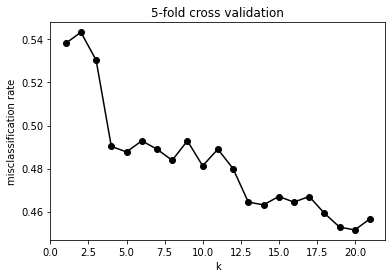

In [24]:
# KNN
def myknn_predict(k, x_train, y_train, x_test):
  labelEst = np.zeros(x_test.shape[0])
  for i, x in enumerate(x_test):
    dist            = norm(x_train - x, axis=1)
    dist_sort_index = argsort(dist)
    neigh_labels    = y_train[dist_sort_index[0:k]]
    labelEst[i]     = argmax(bincount(neigh_labels))
  return labelEst

ks         = arange(1,22,1)
scores     = []
CV         = 5
N_train    = y_train.shape[0]
batch      = N_train/CV

for k in ks:
  x_train_CV = split(Xtrk, CV)
  y_train_CV = split(ytk, CV)
  test_errs  = []
  for i in range(CV):
    index = delete(arange(CV),i)
    x_train_CV_i = vstack([x_train_CV[j] for j in index])
    y_train_CV_i = hstack([y_train_CV[j] for j in index])
    x_test_CV_i  = x_train_CV[i]
    y_test_CV_i  = y_train_CV[i]

    y_test_CV_i_predicted = myknn_predict(k, x_train_CV_i, y_train_CV_i, x_test_CV_i)
    test_errs.append(norm(y_test_CV_i_predicted - y_test_CV_i, 0)/batch)

  scores.append(mean(test_errs))  

plt.figure()
plt.plot(ks, scores, 'ko-')
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.title('5-fold cross validation')


# **Your Answer:**

For supervised learning, I ran logistic regression with mini batch gradient descent, SVM with both hing and log loss functions, and finally KNN.

First I ran PCA to reduce the dimension of the dataset from 1850 feratures to 100 in the case of SVM and logistic. A smaller reduction was required to run KNN as well as making the row axis divisible and no longer prime.

  For the logistic regression, I had to convert the traditiional binary approach in order to adapt to having 4 classes instead of 2. This required multiclass classification via the use of both sigmoid and softmax activation functions. First, I created weights for each one vs all situation then created a weight matrix and finally applied a new activation function in order to predict. With the full original training sET, and a larger amount of pca features, the logistic will give roughly a 12% error. However, to decrease runtime I have settled witha 22% error on only the first 100 principle components. 


Similar to logistic, SVM returned near identical accuracy. I ran it both with hinge and log loss and returned the accuracy for a few different learning rates. SVM required a one vs all modification to y training set as well as the activation function. The function is the same one used in the logistic and works very well.


Finally we have KNN which did not perform well. This was expected because in order to run KNN the train and test set had to be reduced greatly and lost a lot of information. The k-fold cross validation highlights a distinct lowpoint at 20 for the algorithm.








---

# Task 2: Unsupervised Learning

In an unsupervised way, can you develop algorithms that automatically find patterns in the faces that naturally cluster in the **training set** `(X_train)`? You may use **testing set** `(X_test, y_test)` to cross validate your performance. 

In [25]:

def mykmeans(X, K, max_iter=100):
  # step 0
  centroids = X.copy()
  random.shuffle(centroids)
  centroids = centroids[:K]
  
  distortion_list = []
  for i in range(max_iter):
    # step 1
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    distortion_list.append(sum(np.min(distances, axis=0)))
    closest   = argmin(distances, axis=0)
    centroids_old = centroids
    # step 2
    centroids = array([X[closest==k].mean(axis=0) for k in range(K)])
    # step 3
    if sum(centroids-centroids_old) == 0.:
     # print('Number of iteration is ', i+1)
      break

  return centroids, closest, distortion_list


In [26]:
Xtm=np.copy(Xtr)
xtm = np.copy(XT)


In [27]:
i=24
centroids, closest, distortion_list = mykmeans(Xtm,i)


In [28]:
c=[]
t=[]
for j in range(i):
  a=argmax(bincount(y_train[closest==j]))
  #out=np.reshape(centroids,(i,50,37))
  print('Cluster '+str(j)+' is '+target_names[a])
  t.append(a)

#imshow(out[17], cmap = 'gray')


Cluster 0 is George W Bush
Cluster 1 is Colin Powell
Cluster 2 is Donald Rumsfeld
Cluster 3 is George W Bush
Cluster 4 is Colin Powell
Cluster 5 is George W Bush
Cluster 6 is George W Bush
Cluster 7 is George W Bush
Cluster 8 is George W Bush
Cluster 9 is George W Bush
Cluster 10 is George W Bush
Cluster 11 is George W Bush
Cluster 12 is George W Bush
Cluster 13 is George W Bush
Cluster 14 is George W Bush
Cluster 15 is Colin Powell
Cluster 16 is George W Bush
Cluster 17 is Donald Rumsfeld
Cluster 18 is Colin Powell
Cluster 19 is George W Bush
Cluster 20 is Colin Powell
Cluster 21 is George W Bush
Cluster 22 is George W Bush
Cluster 23 is George W Bush


In [29]:
clust=[]
for j in range(258):
  out=[]
  for k in range(i):
    d = norm((centroids[k]-xtm[j]),2)
    out.append(d)
  clust.append(argmin(out))

pred=[]
for l in clust:
  pred.append(t[l])
  
  
test_error = norm(y_test-pred,0)/258
print('For Kmeans with  ',i, 'clusters, error is: ', test_error)


For Kmeans with   24 clusters, error is:  0.4806201550387597


# **Your Answer:**

For unupervised, I ran the Kmeans algorithm. Unfortunately the clustering was not very accurate at all and the best I could achieve was around 46%. The major challenge for obtaining the predictions was unravelling the actual clusters to see what the predicitons were. 



I ended up assigning each cluster to the largest bincount which was the most accuring class in that particular cluster. George Bush was the most reoccuring becuase he appeared the most in the original data set and thus Kmeans had a slight bias towards him. It is important to not the accuracy barely changes from 4 clusters to essentially infinity but in this case 28. This is because I clustered a new point based on the minimization of the L2 norm distance and every new point is measured to the distance of each cluster centroid then assigned. The reason the accuracy does not go down is because I am essentially just breaking down 4 clusters into smaller pieces which wont have any effect when taking the distance because it will still classify same as the larger one.